In [1]:
# import lsst.summit.extras

In [2]:
# lsst.summit.__file__

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#from lsst.summit.extras.plotting.psfPlotting import makeAzElPlot, makeTableFromSourceCatalogs, makeFocalPlanePlot, makeEquatorialPlot
from MYpsfPlotting import makeAzElPlot, makeTableFromSourceCatalogs, makeFocalPlanePlot, makeEquatorialPlot, makeTableFromGrid
from lsst.afw import cameraGeom
from lsst.obs.lsst import LsstComCam, LsstCam
from lsst.geom import Point2D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
from lsst.daf.butler import Butler

In [5]:
def pixel_to_camera(x, y, det):
    """
    Parameters
    ----------
    x, y : array
        Pixel coordinates.
    det : lsst.afw.cameraGeom.Detector
        Detector of interest.
    Returns
    -------
    cam_x, cam_y : array
        Focal plane position in millimeters in DVCS
        See https://lse-349.lsst.io/
    """
    tx = det.getTransform(cameraGeom.PIXELS, cameraGeom.FOCAL_PLANE)
    cam_x, cam_y = tx.getMapping().applyForward(np.vstack((x, y)))
    return cam_x.ravel(), cam_y.ravel()

Stuff to load simulations

In [6]:
import importlib.util
import sys
# sys.path.append("../../notebooks/")
# sys.path.append("/sdf/data/rubin/shared/image_quality/imsim/notebooks/")                #file with convertion between seqnum and collection
# from .sdf.data.rubin.shared.image_quality.imsim.notebooks.collection_dictionary_shared import collection_dictionary

spec = importlib.util.spec_from_file_location("collection_dictionary_shared", 
                                              "/sdf/data/rubin/shared/image_quality/imsim/notebooks/collection_dictionary_shared.py")
collection_dictionary = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = collection_dictionary
spec.loader.exec_module(collection_dictionary)

collection_dictionary = collection_dictionary.collection_dictionary


In [7]:
folder = '/sdf/data/rubin/shared/image_quality/imsim/'
folderout = '/sdf/data/rubin/shared/image_quality/imsim/ellipticitymap/figures/' #where to save figures
#Define the butler data configuration and collection (una tantum )
config = folder+'repo'
seqnum_base = 5023071800000
collection_dict = collection_dictionary()

In [12]:
seqnum = 181
visitid_complete = seqnum+seqnum_base
collections = collection_dict[visitid_complete]

In [13]:
butler = Butler(config, collections=collections)
# butler.collections.query_info(collections[0], include_summary=True)

In [14]:
registry = butler.registry
postisr = list(registry.queryDatasets('icSrc', collections=collections, detector=90))
postisr
#exposure_ids = np.array([data.dataId['exposure'] for data in postisr])
# exposure_ids

[DatasetRef(DatasetType('icSrc', {band, instrument, detector, physical_filter, visit}, SourceCatalog), {instrument: 'LSSTCam', detector: 90, visit: 5023071800181, band: 'r', physical_filter: 'r_57'}, run='pipetask_output/20250214T093220Z', id=e0d99e8d-813c-4ff2-b7a7-5b7893e3f38e)]

In [22]:
# SULLE SORGENTI

icSrcs = []
visitInfos = []
visit_id=postisr[0].dataId['visit']

for i in range(189):
    try:
        print(i)
        icSrcs.append(butler.get("icSrc", dataId={"visit":visit_id, "detector":i}))
        visitInfos.append(butler.get("postISRCCD.visitInfo", dataId={"exposure":visit_id, "detector":i}))
    except:
        continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188


90


ValueError: Per-column arrays must each be 1-dimensional

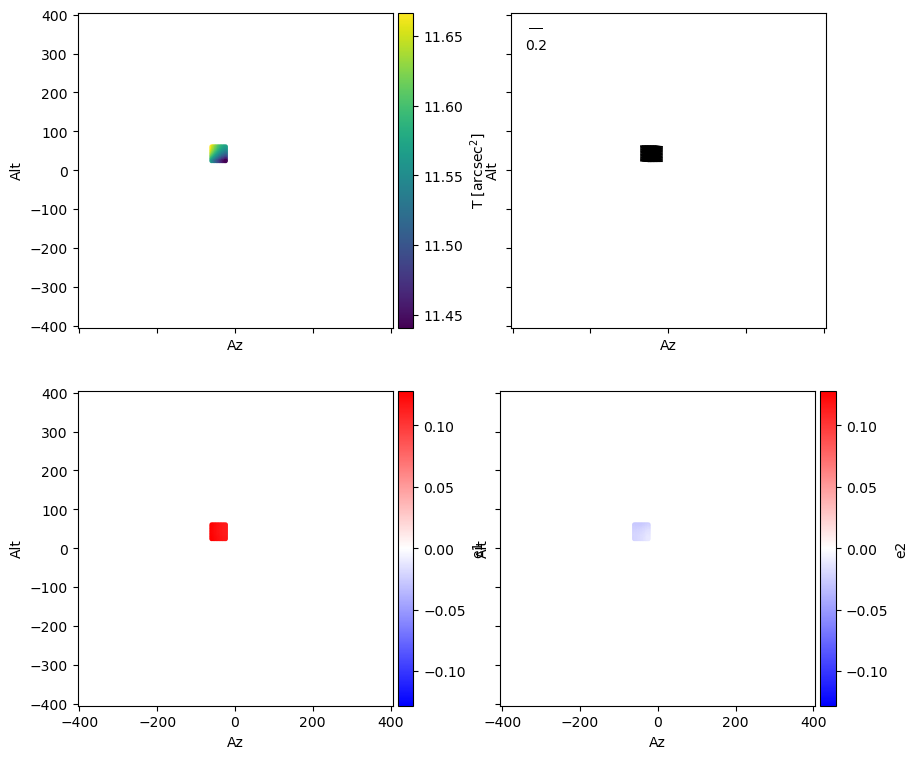

In [32]:
# SU GRIGLIA

calexps = {}
psfs = {}
table_grids= []
visit_id=postisr[0].dataId['visit']
n_grid = 10

visitInfo = butler.get("postISRCCD.visitInfo", dataId={"exposure":visit_id, "detector":90})
calexp = butler.get('calexp', dataId={"visit":visit_id, "detector":90})
psf = calexp.getPsf()
table_grid = makeTableFromGrid(n_grid, calexp, psf, visitInfo)
table_grids.append(table_grid)

for i in range(90, 99, 1):
    print(i)
    visitInfo = butler.get("postISRCCD.visitInfo", dataId={"exposure":visit_id, "detector":i})
    calexp = butler.get('calexp', dataId={"visit":visit_id, "detector":i})
    psf = calexp.getPsf()
    table_grid = makeTableFromGrid(n_grid, calexp, psf, visitInfo)
    table_grids.append(table_grid)

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
    makeAzElPlot(fig, axes, table_grid, camera, saveTableAs=folderout+"ellipticity_wJosh_imsim"+str(seqnum)+"_ccd"+str(i)+".csv")
    
    del calexp

# print(table_grids)

In [ ]:
#table.columns
table.info
#table['nw_x'], table['nw_y']
#table_sel = table['nw_x', 'nw_y']
#table_sel

In [25]:
camera = LsstCam().getCamera()

ORGINAL for Rubin TV

In [ ]:
# butler = Butler(
#     "embargo", 
#     # collections=["LSSTComCam/quickLook"], 
#     collections=["LSSTComCam/nightlyValidation"], 
#     instrument="LSSTComCam"
# )
# camera = LsstComCam().getCamera()

In [ ]:
# dayObs = 20241106 #20241029 #20241028
# seqNum = 251      #33       #10
# visit_id = int(f"{dayObs}{seqNum:05d}")

In [ ]:
# icSrcs = {}
# for i in range(9):
#     icSrcs[i] = butler.get("icSrc", dataId={"visit":visit_id, "detector":i})
# visitInfo = butler.get("postISRCCD.visitInfo", dataId={"exposure":visit_id, "detector":4})
# table = makeTableFromSourceCatalogs(icSrcs, visitInfo)

In [27]:
icSrcs[0]

<class 'lsst.afw.table.SourceCatalog'>
         id         coord_ra ... base_FootprintArea_value
                      rad    ...           pix           
------------------- -------- ... ------------------------
1903404355608903681      nan ...                      215
1903404355608903682      nan ...                      213
1903404355608903683      nan ...                      152
1903404355608903684      nan ...                      195
1903404355608903685      nan ...                      226
1903404355608903686      nan ...                      184
1903404355608903687      nan ...                      220
1903404355608903688      nan ...                      210
1903404355608903689      nan ...                      202
                ...      ... ...                      ...
1903404355608903709      nan ...                      228
1903404355608903710      nan ...                      221
1903404355608903711      nan ...                      223
1903404355608903712      nan ... 

In [26]:
for i in range(3):
    table = makeTableFromSourceCatalogs(icSrcs[i], visitInfos[i])
    #fa figura e tabella
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
    makeAzElPlot(fig, axes, table, camera, saveTableAs=folderout+"ellipticity_wJosh_imsim178_ccd90.csv")
    plt.show()

AttributeError: 'lsst.afw.table._table.SourceColumnView' object has no attribute 'items'

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
# makeFocalPlanePlot(fig, axes, table, camera)
# plt.show()

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
# makeEquatorialPlot(fig, axes, table, camera)
# plt.show()

In [18]:
#table.columns
table_grids[0].info
#table['nw_x'], table['nw_y']
#table_sel = table['nw_x', 'nw_y']
#table_sel

<Table length=100>
 name   dtype  shape
------ ------- -----
   Ixx float64      
   Ixy float64      
   Iyy float64      
     T float64      
    e1 float64      
    e2 float64      
     e float64      
     x float64  (1,)
     y float64  (1,)
aa_Ixx float64      
aa_Iyy float64      
aa_Ixy float64      
 aa_e1 float64      
 aa_e2 float64      
  aa_x float64  (1,)
  aa_y float64  (1,)
nw_Ixx float64      
nw_Iyy float64      
nw_Ixy float64      
 nw_e1 float64      
 nw_e2 float64      
  nw_x float64  (1,)
  nw_y float64  (1,)

In [19]:
camera = LsstCam().getCamera()

In [ ]:
#camera

ORGINAL for Rubin TV

In [ ]:
# butler = Butler(
#     "embargo", 
#     # collections=["LSSTComCam/quickLook"], 
#     collections=["LSSTComCam/nightlyValidation"], 
#     instrument="LSSTComCam"
# )
# camera = LsstComCam().getCamera()

In [ ]:
# dayObs = 20241106 #20241029 #20241028
# seqNum = 251      #33       #10
# visit_id = int(f"{dayObs}{seqNum:05d}")

In [ ]:
# icSrcs = {}
# for i in range(9):
#     icSrcs[i] = butler.get("icSrc", dataId={"visit":visit_id, "detector":i})
# visitInfo = butler.get("postISRCCD.visitInfo", dataId={"exposure":visit_id, "detector":4})
# table = makeTableFromSourceCatalogs(icSrcs, visitInfo)

NameError: name 'table' is not defined

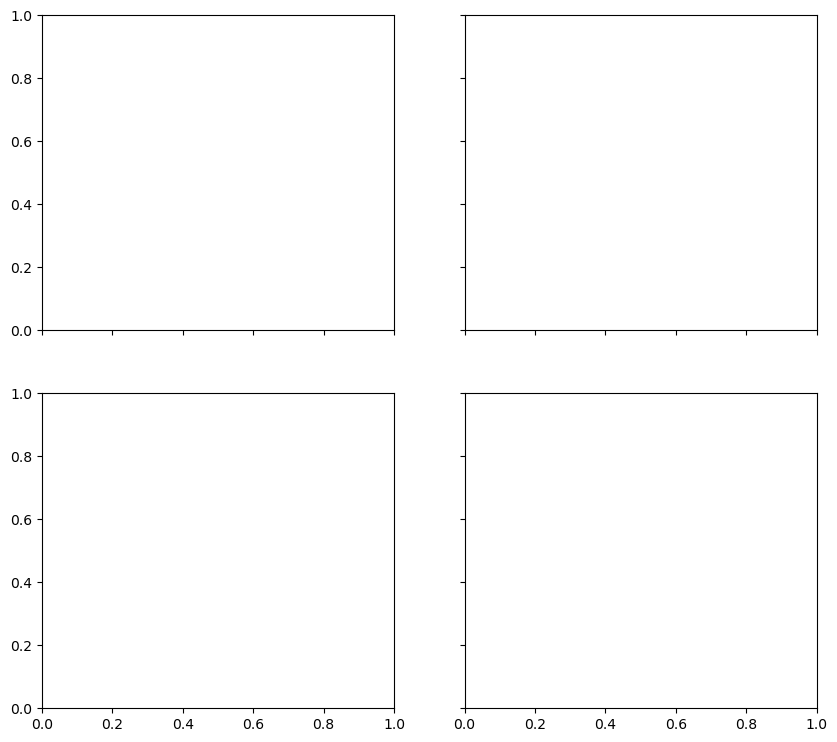

In [27]:
#fa figura e tabella
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
makeAzElPlot(fig, axes, table, camera,saveTableAs="ellipticity_wJosh_imsim145_ccd90.csv")
plt.show()

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
# makeFocalPlanePlot(fig, axes, table, camera)
# plt.show()

In [341]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
# makeEquatorialPlot(fig, axes, table, camera)
# plt.show()